# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("LCS.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
requests.get(btc_url)

<Response [200]>

In [6]:
btc_data = requests.get(btc_url)

In [7]:
btc_json = btc_data.json()

In [8]:
print(json.dumps(btc_json,indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18689800,
            "total_supply": 18689800,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 50253.0,
                    "volume_24h": 74369803690,
                    "market_cap": 942697115388,
                    "percentage_change_1h": 0.0515827829834499,
                    "percentage_change_24h": 0.0827147318232132,
                    "percentage_change_7d": -18.2849928888551,
                    "percent_change_1h": 0.0515827829834499,
                    "percent_change_24h": 0.0827147318232132,
                    "percent_change_7d": -18.2849928888551
                },
                "CAD": {
                    "price": 62695.6428,
                    "volume_24h": 92783767083.644,
                

In [9]:
current_btc_price = btc_json["data"]["1"]["quotes"]["USD"]["price"]

In [10]:
print(current_btc_price)

50253.0


In [11]:
# Fetch current ETH price

In [12]:
requests.get(eth_url)

<Response [200]>

In [13]:
eth_data = requests.get(eth_url)

In [14]:
eth_json = eth_data.json()

In [15]:
print(json.dumps(eth_json,indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 115595453,
            "total_supply": 115595453,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 2313.31,
                    "volume_24h": 57436651468,
                    "market_cap": 267229408601,
                    "percentage_change_1h": 0.120993648646295,
                    "percentage_change_24h": 2.69355338064748,
                    "percentage_change_7d": -4.58826986467519,
                    "percent_change_1h": 0.120993648646295,
                    "percent_change_24h": 2.69355338064748,
                    "percent_change_7d": -4.58826986467519
                },
                "CAD": {
                    "price": 2886.085556,
                    "volume_24h": 71657966371.4768,
                 

In [16]:
current_eth_price = eth_json["data"]["1027"]["quotes"]["USD"]["price"]

In [17]:
print(current_eth_price)

2313.31


In [18]:
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = current_btc_price * my_btc
my_eth_value = current_eth_price * my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $60303.60
The current value of your 5.3 ETH is $12260.54


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [19]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [20]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [21]:
type(alpaca_api_key)

str

In [22]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [23]:
# Format current date as ISO format
today = pd.Timestamp("2020-04-22", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
).df

# Preview DataFrame
df_portfolio.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2020-04-22 00:00:00-04:00  117.16  117.24  116.94  117.095  8111206  278.35   

                                                          
                          high     low   close    volume  
time                                                      
2020-04-22 00:00:00-04:00  281  276.91  279.17  81404148

In [24]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

In [25]:
spy_close_price

279.17

In [26]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.095
Current SPY closing price: $279.17


In [27]:
# Compute the current value of shares
my_spy_value = (my_spy * spy_close_price)
my_agg_value = (my_agg * agg_close_price)

In [28]:
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $13958.50
The current value of your 200 AGG shares is $23419.00


### Savings Health Analysis

In [29]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame

amount = {
    "Amount":[my_btc_value+my_eth_value, my_agg_value+my_spy_value]
}

securities = ["Crypto", "Shares"]

df_savings = pd.DataFrame(amount, index = securities)

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,72564.143
Shares,37377.500


<AxesSubplot:title={'center':'Savings'}, ylabel='Amount'>

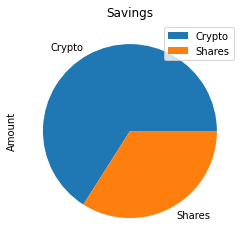

In [37]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount",title="Savings")

In [53]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings

savings_balance = my_agg_value+my_spy_value

# Validate saving health
if savings_balance > emergency_fund:

    print("Congratulations, you have a sizable emergency fund")

elif savings_balance== emergency_fund:
        
    print("Congratualtions, you have a manageable emergency fund")
              
else: 
              
    print(f"I'm sorry you are {emergency_fund - savings_balance} away from your goal")

Congratulations, you have a sizable emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [54]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG


# Display sample data
df_stock_data.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns


In [ ]:
# Printing the simulation input data


In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns


In [ ]:
# Plot simulation outcomes


In [ ]:
# Plot probability distribution and confidence intervals


### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results


# Print summary statistics


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns


In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns


In [ ]:
# Plot simulation outcomes


In [ ]:
# Plot probability distribution and confidence intervals


In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results


# Print summary statistics


In [ ]:
# Set initial investment


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns


In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns


In [ ]:
# Plot simulation outcomes


In [ ]:
# Plot probability distribution and confidence intervals


In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results


# Print summary statistics


In [ ]:
# Set initial investment


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")